In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/cancerpatientdata.csv")

# Review the DataFrame
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df['Level'] = df['Level'].replace(['Low', 'Medium', 'High'], [1, 2, 3])

In [7]:
# Define features set
X = df.copy()
X.drop("Level", axis=1, inplace=True)
X.drop("Patient Id", axis=1, inplace=True)
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [8]:
# Define target vector
y = df["Level"].ravel()
y[:5]

array([1, 2, 3, 3, 3])

In [9]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [12]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [14]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [15]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 1", "Predicted 2", "Predicted 3"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3
Actual 1,72,0,0
Actual 2,0,86,0
Actual 3,0,0,92


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        92

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10774866682308047, 'Obesity'),
 (0.1043546159527646, 'Coughing of Blood'),
 (0.09353433850854237, 'Wheezing'),
 (0.09182012719690186, 'Passive Smoker'),
 (0.06200865594225974, 'Fatigue'),
 (0.05341606974589456, 'Balanced Diet'),
 (0.05189954465621297, 'Alcohol use'),
 (0.04151423181992963, 'Shortness of Breath'),
 (0.038696575227073725, 'Smoking'),
 (0.03822757121899644, 'Dust Allergy'),
 (0.03654645581541872, 'Air Pollution'),
 (0.03604383620016289, 'Swallowing Difficulty'),
 (0.034705182752057306, 'Clubbing of Finger Nails'),
 (0.03402383286342143, 'Snoring'),
 (0.02874393164765327, 'OccuPational Hazards'),
 (0.02861631630045619, 'Genetic Risk'),
 (0.02831874858760664, 'Chest Pain'),
 (0.027031442705976006, 'Frequent Cold'),
 (0.022879322668913845, 'Weight Loss'),
 (0.018328375217719885, 'chronic Lung Disease'),
 (0.014640407645264124, 'Dry Cough'),
 (0.006550813891647044, 'Age'),
 (0.0003509366120465224, 'Gender')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

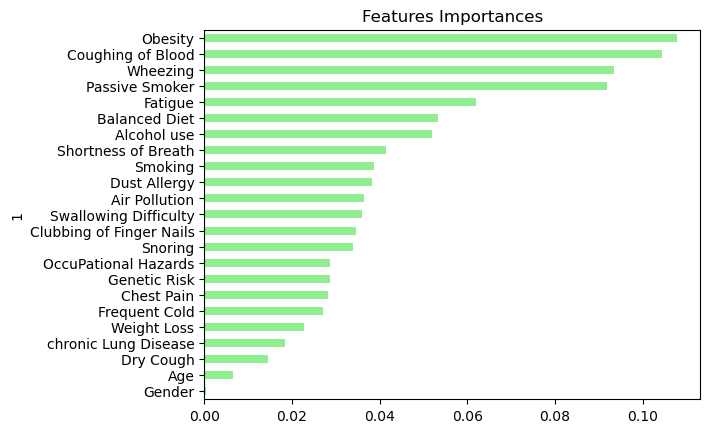

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)